### **California Housing Price Prediction XGBoost**

[Sumber data California house price](https://drive.google.com/drive/folders/19YA_f36uGR86hTnZuX-Ech59s3AFzXXo) 

#### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **1. Business Problem Understanding**

**Context**

Pada tahun 1990, harga perumahan di California relatif cukup tinggi dan ketersediaan rumah dengan harga yang terjangkau sangatlah rendah. Menurut National Association of Realtors (NAR), harga rata-rata rumah di California adalah $233.000 pada tahun 1990, yang secara signifikan lebih tinggi daripada rata-rata nasional, yaitu sebesar $89.000. Harga yang tinggi ini disebabkan oleh ekonomi yang kuat, pertumbuhan penduduk yg tinggi, dan kurangnya lahan yang tersedia untuk pembangunan perumahan baru di California.

Selain itu, pasar perumahan California juga dipengaruhi oleh ekonomi nasional yang lebih luas. Pada awal 1990-an, ekonomi AS mengalami resesi, yang menyebabkan penurunan harga rumah di banyak bagian negara. Namun, ekonomi di California relatif tangguh, dan negara bagian tersebut tidak mengalami tingkat penurunan harga rumah yang sama seperti bagian lain negara itu.

Harga tersebut di atas didasarkan pada harga rata-rata semua rumah di California. Namun, harga rumah sangatlah bervariasi tergantung pada lokasi, jenis dan kondisi rumah, lingkungan sekitar, dan faktor lainnya. Misalnya, rumah di lingkungan yang lebih makmur seperti Beverly Hills atau San Francisco Pacific Heights akan jauh lebih mahal daripada rumah di lingkungan yang kurang makmur seperti South Central atau East LA.

Dengan fakta tersebut, sangatlah menjanjikan bagi perusahaan real estate untuk memanfaatkan peluang bisnis di California. Perusahaan dapat membeli rumah dengan harga yang seminimal mungkin dan menjual rumah dengan harga yang kompetitif. Penentuan harga rumah yang akan dijual dan dibeli oleh perusahaan merupakan salah satu hal yg krusial untuk menghasilkan keuntungan bagi perusahaan.

**Problem Statement**

Sebagai perusahaan real estate, sangatlah penting untuk memiliki informasi yang akurat tentang harga rumah guna menentukan harga jual atau beli rumah tersebut. Proyek ini dilakukan untuk mengembangkan model yang dapat memprediksi harga rumah di wilayah target dengan tingkat akurasi yang tinggi. Model ini akan dilatih dengan dataset harga perumahan historis, karakteristik properti, dan informasi demografis untuk area target tersebut. Dengan menggunakan model ini, perusahaan akan dapat menentukan dengan lebih baik tentang harga rumah untuk dijual dengan harga yang tidak *underpriced* atau ketika hendak membeli rumah sehingga tidak membeli dengan harga yang *overpriced*. **Tujuan dari proyek ini adalah untuk membuat model yang dapat meningkatkan profit perusahaan dengan cara menjual dan membeli rumah dengan harga yang paling menguntungkan bagi perusahaan, yaitu tidak *underpriced* dan tidak juga *overpriced*.**

**Goals**

Berdasarkan permasalahan tersebut, **perusahaan tentu perlu memiliki 'tool' yang dapat memprediksi harga rumah sehingga dapat menentukan harga rumah yang tepat yang akan dijual atau dibeli**. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu rumah, seperti jumlah ruangan, jumlah kamar, lokasi, median pendapatan penghuninya, dll dapat menambah keakuratan prediksi harga rumah, yang mana dapat mendatangkan profit bagi perusahaan. Dengan informasi prediksi harga rumah yang baik, perusahaan dapat menentukan harga yang tepat untuk menjual rumah agar mendapatkan keuntungan yang maksimal dan meminimalisir menjual dengan harga yang *underpriced* serta untuk membeli rumah dengan harga yang terjangkau dan menghindari membeli rumah yang *overpriced*.

Bagi perusahaan, prediction tool yang dapat memberikan prediksi harga secara fair tentu dapat meningkatkan revenue perusahaan, dalam konteks ini didapat dari 'income' yang akan diperoleh dari penjualan atau pembelian rumah tersebut.

**Analytic Approach**

Jadi, yang perlu dilakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan suatu rumah dengan yang lainnya.

Selanjutnya, akan dibangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi harga rumah, yang mana akan berguna untuk menentukan harga rumah ketika akan menjual atau membeli rumah.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, bisa juga menggunakan nilai R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### **2. Data Understanding**

- Dataset berisi informasi dari sensus di California tahun 1990.
- Setiap baris data berkaitan dengan rumah yang ada di distrik California dan beberapa ringkasan statistik berdasarkan data sensus pada tahun 1990. 

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | A measure of how far west a house is; a higher value is farther west
| latitude | Float | A measure of how far north a house is; a higher value is farther north
| housing_median_age | Float | Median age of a house within a block; a lower number is a newer building
| total_rooms | Float | Total number of rooms within a block
| total_bedrooms | Float | Total number of bedrooms within a block
| population | Float | Total number of people residing within a block
| households | Float | Total number of households, a group of people residing within a home unit, for a block
| median_income | Float | Median income for households within a block of houses (measured in tens of thousands of US Dollars)
| ocean_proximity | Object | Location of the house w.r.t ocean/sea
| median_house_value | Float | Median house value for households within a block (measured in US Dollars)

In [242]:
# Import library yang dibutuhkan untuk eksplorasi dataset

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [243]:
# Load dataset

df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [244]:
# Cek info dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [245]:
# Cek null value dataset

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Terdapat 14448 baris data dan 10 kolom pada dataset, dengan tipe data pada semua kolom adalah float, kecuali pada kolom ocean proximity yang memiliki tipe data object. Terlihat pula bahwa terdapat 137 baris data missing value pada kolom 'total_bedrooms'. 

**Numerikal Variabel**

In [246]:
# Cek statistik deskriptif pada data numerik

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


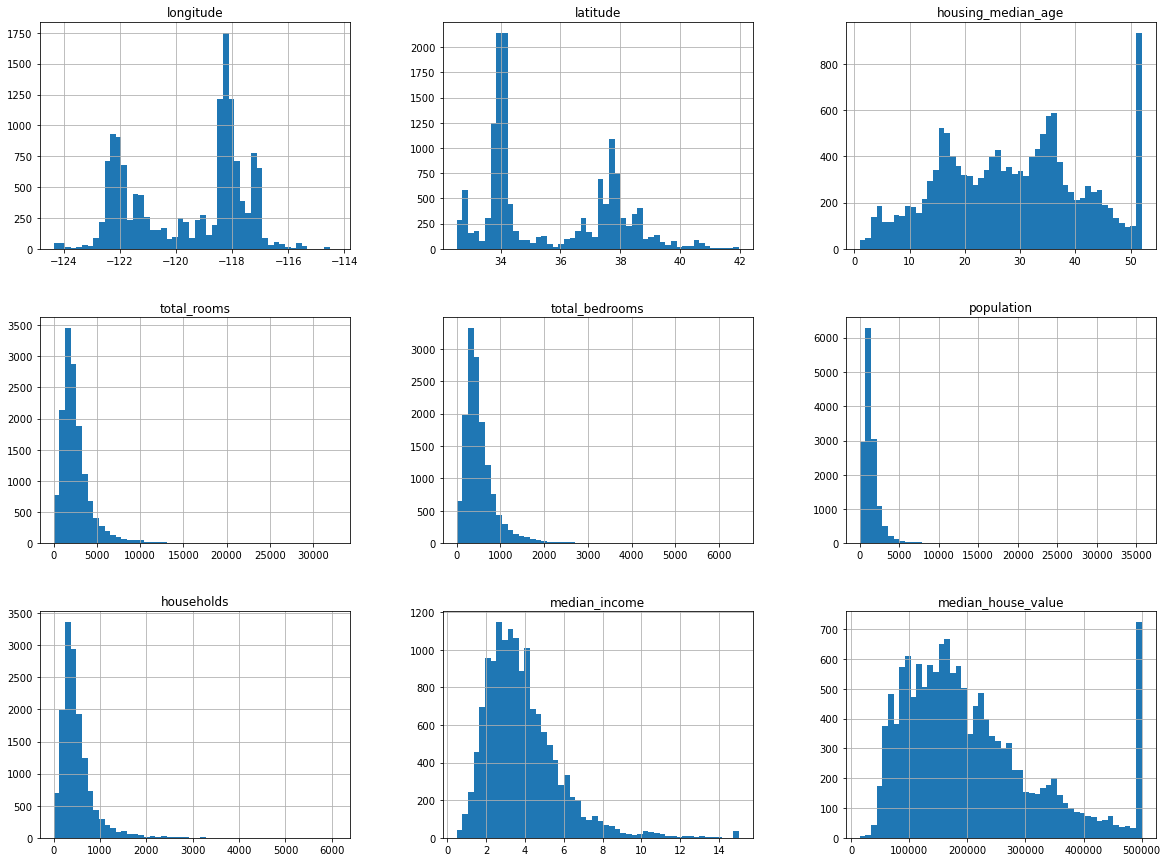

In [247]:
# Hisogram numerikal variabel

df.hist(bins=50, figsize=(20,15));

Berdasarkan histogram di atas, terlihat bahwa dari semua kolom numerik tidak ada yang berdistribusi normal atau bell-shaped. Mayoritas data terdapat 'right-skewed distribution', yaitu pada kolom 'total_rooms',	'total_bedrooms',	'population',	'households',	'median_income', dan	'median_house_value'. Dengan kata lain, terdapat skewness positif pada fitur-fitur tersebut. Selain itu terdapat pula banyak outliers pada nilai di sekitar 50 pada housing_median_age dan di sekitar 500000 pada kolom median_house_value. 

**Kategorikal Variabel**

In [248]:
# Cek jumlah rumah berdasarkan ocean proximity

print(f"Jumlah properti di tiap ocean proximity:\n{df['ocean_proximity'].value_counts()}")

Jumlah properti di tiap ocean proximity:
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64


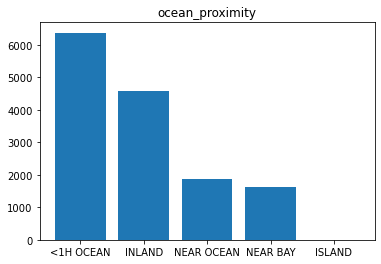

In [249]:
# Plot kolom ocean proximity

plt.bar(x=df['ocean_proximity'].value_counts().index, height=df['ocean_proximity'].value_counts())
plt.title("ocean_proximity");

Mayoritas data rumah pada dataset merupakan rumah yang terletak pada area dengan jarak ke laut perjalanan kurang dari satu jam (<1H OCEAN) dan rumah yang terletak di pedalaman (INLAND). Hanya ada dua data rumah yang terletak pada area di suatu pulau (ISLAND).

In [250]:
# Cek median price untuk tiap ocean proximity

df_median_price = df.groupby(by=['ocean_proximity']).agg({'median_house_value':'median'}).reset_index()
df_median_price = df_median_price.set_index('ocean_proximity')
df_median_price = df_median_price.sort_values('median_house_value', ascending =False)
df_median_price

,median_house_value
ocean_proximity,
ISLAND,351100.0
NEAR BAY,230800.0
NEAR OCEAN,228600.0
<1H OCEAN,214800.0
INLAND,108800.0


Berdasarkan nilai 'median_house_value', justru rumah yang memiliki harga paling tinggi adalah yang berada di ISLAND kemudian berturut-turut di bawahnya adalah NEAR BAY, NEAR OCEAN, <1H OCEAN, dan yang paling rendah adalah INLAND.

**Location**

Text(0.5, 1.0, 'California Ocean Proximity Group Location')

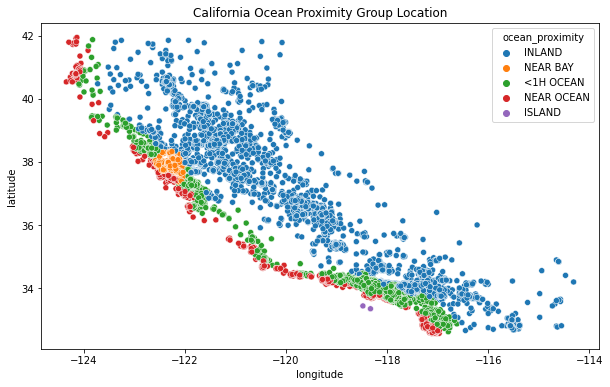

In [251]:
# Plot lokasi rumah berdasarkan ocean_proximity

plt.figure(figsize=(10, 6))
sns.scatterplot(df['longitude'], df['latitude'], hue=df['ocean_proximity']).set_title('California Ocean Proximity Group Location')

Persebaran lokasi rumah yang ada di California pada dataset digambarkan dengan peta di atas berdasarkan 'ocean_proximity'-nya. Terlihat bahwa rumah yang ada mayoritas berada di area INLAND dan hanya ada dua data rumah yang berada di area ISLAND.

### **2. Data Preprocessing**

Untuk proses data preprocessing dan feature engineering, akan digunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [252]:
# Membuat duplikasi dataframe

df_model = df.copy()

In [253]:
# Cek info lebih detail untuk setiap fitur

listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, ..."
1,latitude,float64,0,0.00,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6..."
2,housing_median_age,float64,0,0.00,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0..."
3,total_rooms,float64,0,0.00,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0..."
4,total_bedrooms,float64,137,0.95,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14..."
5,population,float64,0,0.00,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ..."
6,households,float64,0,0.00,1649,"[40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14..."
7,median_income,float64,0,0.00,9797,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8..."
8,ocean_proximity,object,0,0.00,5,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]"
9,median_house_value,float64,0,0.00,3548,"[47500.0, 100000.0, 285800.0, 175000.0, 59200...."


**Missing Value**

Pada tahap ini, akan dilakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan digunakan untuk proses analisis selanjutnya, yaitu melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

In [254]:
# Cek nilai missing value

df_model.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Dari info dataset di atas, terdapat data yang kosong yaitu hanya pada kolom 'total_bedrooms'. Selanjutnya, perlu mengobservasi lebih lanjut terkait data-data yang hilang tersebut agar dapat menentukan langkah treatment yang tepat untuk mengatasinya.

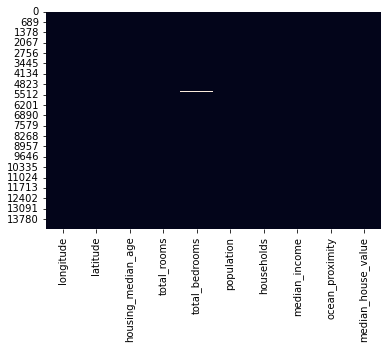

In [255]:
# Missing value heatmap

sns.heatmap(df_model.isnull(), cbar=False);

Hanya terdapat 1 fitur yang memiliki missing value, yaitu kolom 'total_bedrooms'. Tentu perlu ada pertimbangan sebelum melakukan drop pada data. Diketahui bahwa pada kolom total_bedrooms hanya 137 baris data atau 0.95% saja baris data yang missing di antara seluruh data yang lain. Dengan pertimbangan bahwa hanya sejumlah kecil saja data tersebut dan tidak terdapat metode lain yang lebih efektif untuk menangani missing value tersebut, maka dalam kasus ini 137 missing value tersebut akan di drop.

In [256]:
# Drop missing value

df_model.dropna(axis='rows', inplace=True)

In [257]:
# Cek kembali dataset info

df_model.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Terlihat bahwa sudah tidak ada lagi missing value pada dataset. Selanjutnya, perlu juga mengecek apakah terdapat nilai-nilai yang dirasa tidak masuk akal pada setiap fiturnya, misal ada nilai yang kurang dari 0. Bisa mengeceknya melalui statistika deskriptif untuk tiap numerikal fitur.

In [258]:
# Cek deskriptif statistik fitur numerikal

num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,-119.567150,35.631365,28.609671,2640.917686,538.260709,1424.772273,499.480470,3.866774,206793.156942
std,2.006374,2.139589,12.606493,2197.192896,423.577544,1151.795857,383.826005,1.890866,115404.371629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1164.000000,410.000000,3.540300,180000.000000
75%,-118.000000,37.715000,37.000000,3142.000000,647.000000,1722.000000,603.500000,4.736100,263750.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Secara sekilas terlihat bahwa tidak ada data yang bernilai kurang dari 0 atau tergolong data tidak masuk akal, kecuali pada kolom 'longitude' karena hal tersebut memungkinkan untuk posisi koordinat letak geografi California.

**Data Duplikat**

In [259]:
# Cek data duplikat

df_model.duplicated().sum()

0

Dataset ini tidak memiliki data yang duplikat. Sehingga setiap baris datanya merupakan hasil observasi yang unique dengan baris data yang lainnya.

**Data Correlation**

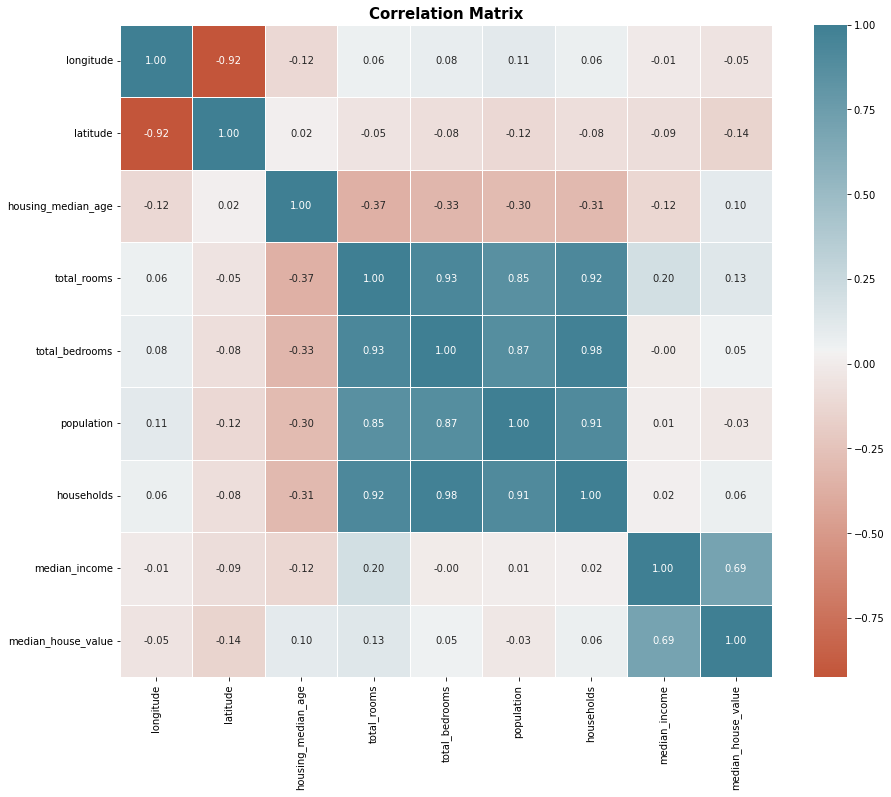

In [260]:
# Correlation matrix

plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Correlation matrix menunjukkan bahwa hanya fitur 'median_income' memiliki korelasi yang kuat terhadap fitur 'median_house_value', di mana korelasinya adalah korelasi positif. Ini berarti bahwa semakin besar median income yang dimiliki, maka harga rumah yang ditempatinya pun semakin mahal. Atau dengan kata lain, semakin kaya seseorang maka semakin mahal rumahnya. Selain fitur tersebut, fitur yang lain memiliki korelasi yang lemah.

**Outliers Detection**

Selanjutnya, akan dicek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat dilakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

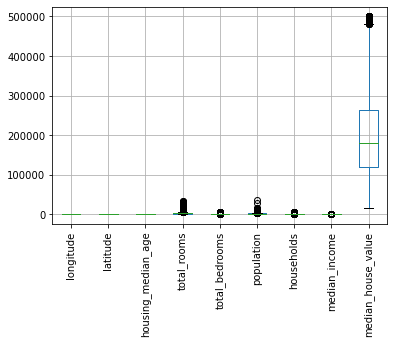

In [261]:
# Plot boxplot untuk mengecek outliers

df_model.boxplot(rot=90);

Terlihat banyak sekali outliers pada beberapa fitur. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi rumah yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [262]:
# Membuat fungsi untuk mengecek outliers

def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

Tahapan yang akan dilakukan dimulai dengan mencari nilai-nilai pada batas outliers dengan metode IQR, selanjutnya akan dilakukan feature engineering terhadap fitur-fitur numerikal tersebut. Pada tahapan berikutnya akan dicek untuk nilai yang berada di luar batas limit, kemudian dengan domain knowledge akan dipertimbangkan untuk mengeliminasi data yang berada di atas limit atas tersebut untuk proses modeling sehingga nantinya hal tersebut akan menjadi limitasi model.

**Median House Value**

In [263]:
# Cek deskriptif statistik kolom median_house_value

df_model['median_house_value'].describe()

count     14311.000000
mean     206793.156942
std      115404.371629
min       14999.000000
25%      119400.000000
50%      180000.000000
75%      263750.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [264]:
# Outliers pada fitur median_house_value

find_anomalies(df_model['median_house_value'])

IQR: 144350.0
limit_bawah: -97125.0
limit_atas: 480275.0


In [265]:
# Cek median_house_value > USD 480275

df_model[df_model['median_house_value'] > 480275].count()['median_house_value']

751

Terlihat bahwa 75% data pada kolom median_house_value bernilai kurang dari USD 263750, sedangkan nilai maksimalnya adalah USD 500001. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 751 data yang nilai median_house_value-nya lebih besar dari USD 480275 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki median_house_value lebih besar dari  USD 480275 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

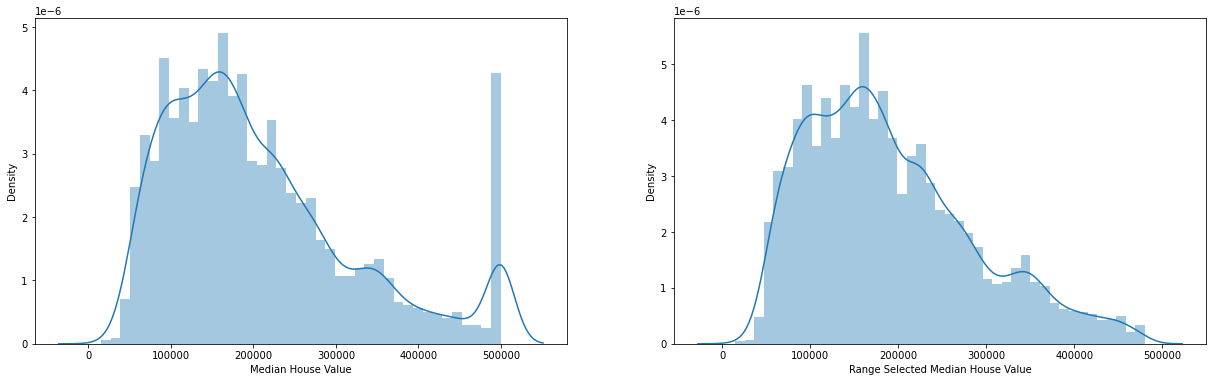

In [266]:
# Melakukan filtering pada data

df_model = df_model[(df_model['median_house_value'] <= 480275)]

# Plot distribusi data sebelum dan sesudah filtering

fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.distplot(df_model['median_house_value'], ax=axes[1])
axes[0].set_xlabel('Median House Value')
axes[1].set_xlabel('Range Selected Median House Value');

In [267]:
# Cek deskriptif statistik kolom median_house_value setelah filtering

df_model['median_house_value'].describe()

count     13560.000000
mean     190602.086799
std       95180.551359
min       14999.000000
25%      116200.000000
50%      173350.000000
75%      246000.000000
max      480100.000000
Name: median_house_value, dtype: float64

**Median Income**

In [268]:
# Cek deskriptif statistik kolom median_income

df_model['median_income'].describe()

count    13560.000000
mean         3.657021
std          1.543609
min          0.499900
25%          2.523800
50%          3.447300
75%          4.561750
max         15.000100
Name: median_income, dtype: float64

In [269]:
# Outliers pada fitur median_income

find_anomalies(df_model['median_income'])

IQR: 2.03795
limit_bawah: -0.5331249999999996
limit_atas: 7.618675


In [270]:
# Cek median_income > USD 7.618675

df_model[df_model['median_income'] > 7.618675].count()['median_income']

232

Terlihat bahwa 75% data pada kolom median_income bernilai kurang dari USD 4.56175, sedangkan nilai maksimalnya adalah USD 15.0001. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 232 data yang nilai median_income-nya lebih besar dari USD 7.618675 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki median_income lebih besar dari  USD 7.618675 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

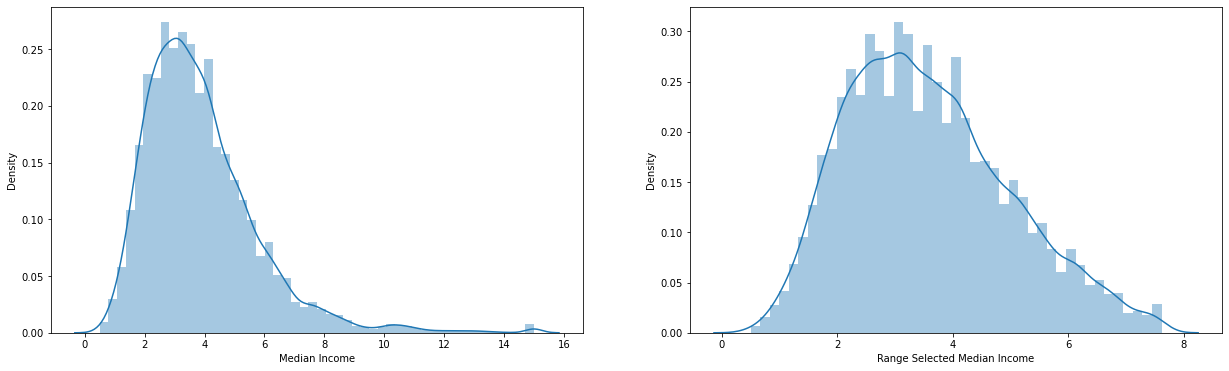

In [271]:
# Melakukan filtering pada data

df_model = df_model[(df_model['median_income'] <= 7.618675)]

# Plot distribusi data sebelum dan sesudah filtering

fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['median_income'], ax=axes[0])
sns.distplot(df_model['median_income'], ax=axes[1])
axes[0].set_xlabel('Median Income')
axes[1].set_xlabel('Range Selected Median Income');

In [272]:
# Cek deskriptif statistik kolom median_income setelah filtering

df_model['median_income'].describe()

count    13328.000000
mean         3.573083
std          1.411601
min          0.499900
25%          2.510325
50%          3.402950
75%          4.488850
max          7.618000
Name: median_income, dtype: float64

**Total Rooms**

In [273]:
# Cek deskriptif statistik kolom total_rooms

df_model['total_rooms'].describe()

count    13328.000000
mean      2605.820153
std       2159.505017
min          2.000000
25%       1437.000000
50%       2101.000000
75%       3107.250000
max      32627.000000
Name: total_rooms, dtype: float64

In [274]:
# Outliers pada fitur total_rooms

find_anomalies(df_model['total_rooms'])

IQR: 1670.25
limit_bawah: -1068.375
limit_atas: 5612.625


In [275]:
# Cek total_rooms > 5612 rooms

df_model[df_model['total_rooms'] > 5612].count()['total_rooms']

834

Terlihat bahwa 75% data pada kolom total_rooms bernilai kurang dari 3107 rooms, sedangkan nilai maksimalnya adalah 32627. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 834 data yang nilai total_rooms-nya lebih besar dari 5612 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki total_rooms lebih besar dari  5612 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

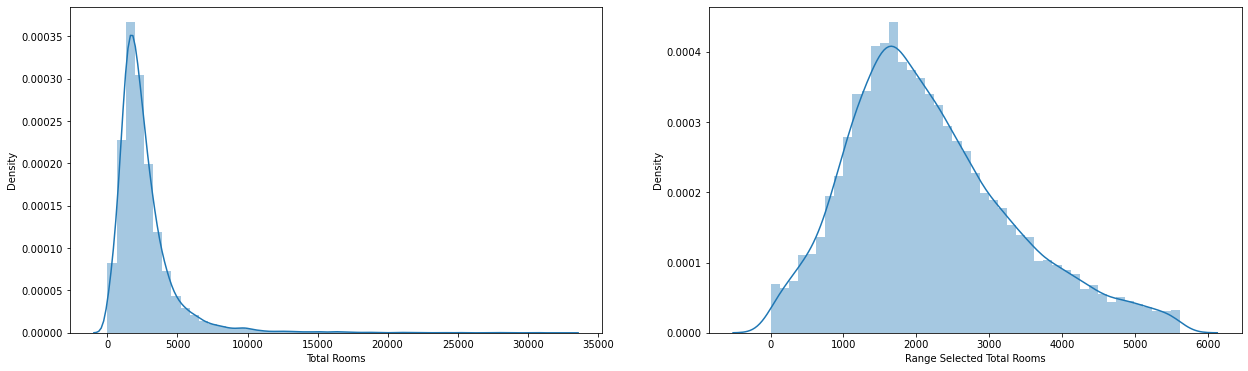

In [276]:
# Melakukan filtering pada data

df_model = df_model[(df_model['total_rooms'] <= 5612)]

# Plot distribusi data sebelum dan sesudah filtering

fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['total_rooms'], ax=axes[0])
sns.distplot(df_model['total_rooms'], ax=axes[1])
axes[0].set_xlabel('Total Rooms')
axes[1].set_xlabel('Range Selected Total Rooms');

In [277]:
# Cek deskriptif statistik kolom total_rooms setelah filtering

df_model['total_rooms'].describe()

count    12494.000000
mean      2195.375860
std       1134.146493
min          2.000000
25%       1392.000000
50%       2008.500000
75%       2847.500000
max       5612.000000
Name: total_rooms, dtype: float64

**Households**

In [278]:
# Cek deskriptif statistik kolom households

df_model['households'].describe()

count    12494.000000
mean       433.773731
std        231.594047
min          2.000000
25%        274.000000
50%        395.000000
75%        559.000000
max       2374.000000
Name: households, dtype: float64

In [279]:
# Outliers pada fitur households

find_anomalies(df_model['households'])

IQR: 285.0
limit_bawah: -153.5
limit_atas: 986.5


In [280]:
# Cek households > 986.5

df_model[df_model['households'] > 986.5].count()['households']

296

Terlihat bahwa 75% data pada kolom households bernilai kurang dari 559, sedangkan nilai maksimalnya adalah 2374. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 296 data yang nilai households-nya lebih besar dari 986.5 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki households lebih besar dari  986.5 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

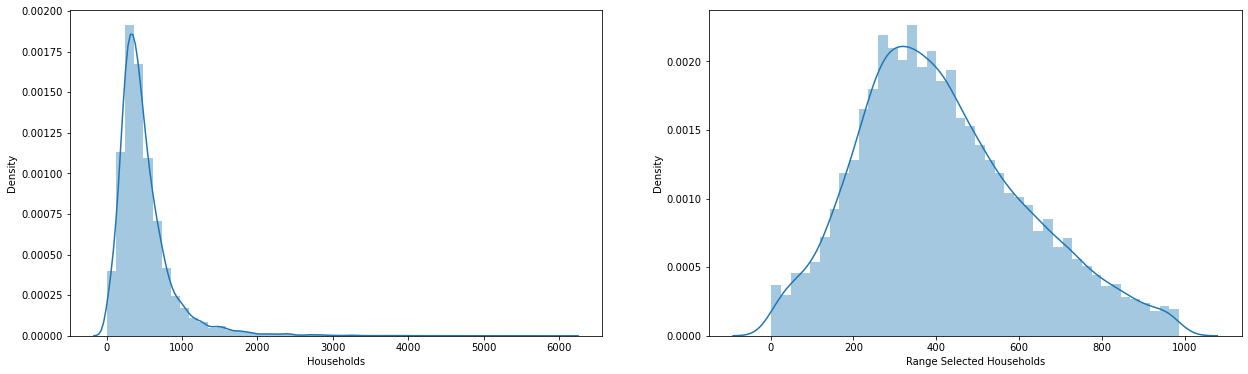

In [281]:
# Melakukan filtering pada data

df_model = df_model[(df_model['households'] <= 986.5)]

# Plot distribusi data sebelum dan sesudah filtering

fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['households'], ax=axes[0])
sns.distplot(df_model['households'], ax=axes[1])
axes[0].set_xlabel('Households')
axes[1].set_xlabel('Range Selected Households');

In [282]:
# Cek deskriptif statistik kolom households setelah filtering

df_model['households'].describe()

count    12198.000000
mean       416.204624
std        202.511140
min          2.000000
25%        271.000000
50%        389.000000
75%        543.000000
max        986.000000
Name: households, dtype: float64

**Total Bedrooms**

In [283]:
# Cek deskriptif statistik kolom total_bedrooms

df_model['total_bedrooms'].describe()

count    12198.000000
mean       445.534596
std        219.578521
min          2.000000
25%        286.000000
50%        413.000000
75%        581.750000
max       1526.000000
Name: total_bedrooms, dtype: float64

In [284]:
# Outliers pada fitur total_bedrooms

find_anomalies(df_model['total_bedrooms'])

IQR: 295.75
limit_bawah: -157.625
limit_atas: 1025.375


In [285]:
# Cek total_bedrooms > 1175

df_model[df_model['total_bedrooms'] > 1175].count()['total_bedrooms']

9

Terlihat bahwa 75% data pada kolom total_bedrooms bernilai kurang dari 581.75, sedangkan nilai maksimalnya adalah 1526. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 9 data yang nilai total_bedrooms-nya lebih besar dari 1175 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki total_bedrooms lebih besar dari  1175 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

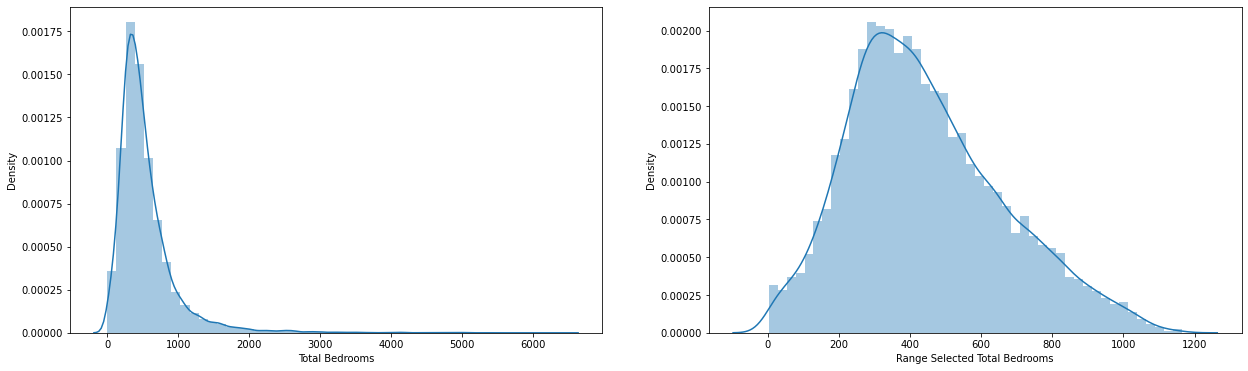

In [286]:
# Melakukan filtering pada data

df_model = df_model[(df_model['total_bedrooms'] <= 1175)]

# Plot distribusi data sebelum dan sesudah filtering

fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['total_bedrooms'], ax=axes[0])
sns.distplot(df_model['total_bedrooms'], ax=axes[1])
axes[0].set_xlabel('Total Bedrooms')
axes[1].set_xlabel('Range Selected Total Bedrooms');

In [287]:
# Cek deskriptif statistik kolom total_bedrooms setelah filtering

df_model['total_bedrooms'].describe()

count    12189.000000
mean       444.915908
std        218.457334
min          2.000000
25%        286.000000
50%        413.000000
75%        581.000000
max       1164.000000
Name: total_bedrooms, dtype: float64

**Population**

In [288]:
# Cek deskriptif statistik kolom population

df_model['population'].describe()

count    12189.000000
mean      1215.253097
std        654.390144
min          3.000000
25%        769.000000
50%       1114.000000
75%       1565.000000
max       8733.000000
Name: population, dtype: float64

In [289]:
# Outliers pada fitur population

find_anomalies(df_model['population'])

IQR: 796.0
limit_bawah: -425.0
limit_atas: 2759.0


In [290]:
# Cek population > 3129

df_model[df_model['population'] > 3129].count()['population']

138

Terlihat bahwa 75% data pada kolom population bernilai kurang dari 1565, sedangkan nilai maksimalnya adalah 8733. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 138 data yang nilai population-nya lebih besar dari 3129 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki population lebih besar dari  3129 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

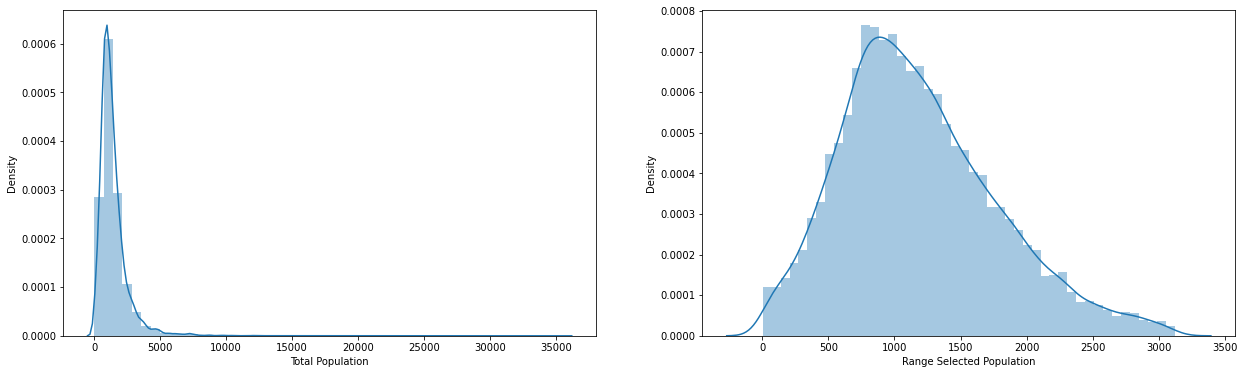

In [291]:
# Melakukan filtering pada data

df_model = df_model[(df_model['population'] <= 3129)]

# Plot distribusi data sebelum dan sesudah filtering

fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['population'], ax=axes[0])
sns.distplot(df_model['population'], ax=axes[1])
axes[0].set_xlabel('Total Population')
axes[1].set_xlabel('Range Selected Population');

In [292]:
# Cek deskriptif statistik kolom population setelah filtering

df_model['population'].describe()

count    12051.000000
mean      1186.447681
std        593.278336
min          3.000000
25%        765.000000
50%       1106.000000
75%       1544.000000
max       3121.000000
Name: population, dtype: float64

**Clean Dataset**

In [293]:
# Cek dataset yang sudah bersih
df_model.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
7,-121.26,38.69,17.0,3917.0,638.0,1809.0,564.0,5.2586,INLAND,137000.0


In [294]:
# Cek info lebih detail untuk setiap fitur

listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.0,791,"[-119.79, -122.21, -118.04, -119.81, -121.26, ..."
1,latitude,float64,0,0.0,824,"[36.73, 37.77, 33.87, 38.69, 37.44, 34.05, 38...."
2,housing_median_age,float64,0,0.0,52,"[52.0, 43.0, 17.0, 50.0, 4.0, 31.0, 27.0, 15.0..."
3,total_rooms,float64,0,0.0,4066,"[112.0, 1017.0, 2358.0, 772.0, 3917.0, 1646.0,..."
4,total_bedrooms,float64,0,0.0,1054,"[28.0, 328.0, 396.0, 194.0, 638.0, 408.0, 799...."
5,population,float64,0,0.0,2595,"[193.0, 836.0, 1387.0, 606.0, 1809.0, 853.0, 1..."
6,households,float64,0,0.0,966,"[40.0, 277.0, 364.0, 167.0, 564.0, 410.0, 754...."
7,median_income,float64,0,0.0,7956,"[1.975, 2.2604, 6.299, 2.2206, 5.2586, 5.0821,..."
8,ocean_proximity,object,0,0.0,5,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]"
9,median_house_value,float64,0,0.0,3298,"[47500.0, 100000.0, 285800.0, 59200.0, 137000...."


In [295]:
# Cek kembali info dataset

df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12051 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12051 non-null  float64
 1   latitude            12051 non-null  float64
 2   housing_median_age  12051 non-null  float64
 3   total_rooms         12051 non-null  float64
 4   total_bedrooms      12051 non-null  float64
 5   population          12051 non-null  float64
 6   households          12051 non-null  float64
 7   median_income       12051 non-null  float64
 8   ocean_proximity     12051 non-null  object 
 9   median_house_value  12051 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.0+ MB


In [296]:
# Baris data yang dieliminasi berdasarkan nilai outliers

1 - 12051/14448

0.16590531561461797

Pada akhirnya, tersisa 12051 baris data yang akan digunakan untuk pemodelan. Ini berarti 16% data sudah tereliminasi sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya.

### **4. Modeling**

In [326]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [298]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop = 'first', handle_unknown = 'ignore'), ['ocean_proximity'])
], remainder='passthrough')

**Data Splitting**

In [299]:
# Memisahkan data independen variabel dengan target

X = df_model.drop(['median_house_value'], axis=1)
y = df_model['median_house_value']

**Train and Test Splitting**

In [300]:
# Splitting data training dan test dengan proporsi 70:30

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

**Choose a Benchmark Model**

In [301]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-58609.48504324 -58356.35433835 -58132.4658377  -57653.15856643
 -57399.27000318] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-41326.50054029 -40670.87650014 -41595.09805902 -41203.24296
 -40750.19593538] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.24356101 -0.2356132  -0.24678983 -0.24123025 -0.2399694 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-55307.96430177 -56112.70638599 -55664.851526   -54809.68665501
 -54384.19252423] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-37764.44948091 -38775.11363819 -38175.60563539 -37296.87509988
 -37094.20861474] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
   

In [302]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan

pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-58030.146758,445.564587,-41109.182799,350.191929,-0.241433,0.003722
1,KNN Regressor,-55255.880279,610.417807,-37821.250494,606.993948,-0.216642,0.002471
2,DecisionTree Regressor,-64240.454794,895.042070,-43042.134321,410.977705,-0.256051,0.006964
3,RandomForest Regressor,-46509.183565,759.009489,-30735.413963,655.060079,-0.176816,0.002998
4,XGBoost Regressor,-44503.871661,525.495027,-29378.394453,283.609079,-0.170576,0.002811


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, MAE dan MAPE, XGBoost adalah model terbaik. RandomForest memiliki sedikit selisih nilai RMSE, MAE dan MAPE dengan XGBoost.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [317]:
# Benchmark 2 model terbaik
models = {
    'XGBoost': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGBoost,44212.096185,29958.285058,0.181009
RandomForest,45785.132899,30813.835301,0.188053


Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari RandomForest.

**Metode XGBoost**

Metode XGBoost merupakan pengembangan dari algoritma GBDT (Gradient Boosting Decision Tree) yang sebelumnya ditemukan oleh Friedman, yang diusulkan oleh Dr. Tianqi Chen dari University of Washington pada tahun 2014. Gradient boosting merupakan algoritma yang dapat menemukan solusi yang optimal untuk berbagai masalah khususnya pada regresi, klasifikasi dan ranking. Konsep dasar dari algoritma ini adalah menyesuaikan parameter pembelajaran secara berulang untuk menurunkan loss function (mekanisme evaluasi atas model).

XGBoost menggunakan model yang lebih teratur untuk membangun struktur pohon regresi, sehingga dapat memberikan kinerja yang lebih baik dan mampu mengurangi kompleksitas model untuk menghindari overfitting. Hasil prediksi akhir dari XGBoost adalah penjumlahan hasil prediksi dari
setiap pohon regresi.

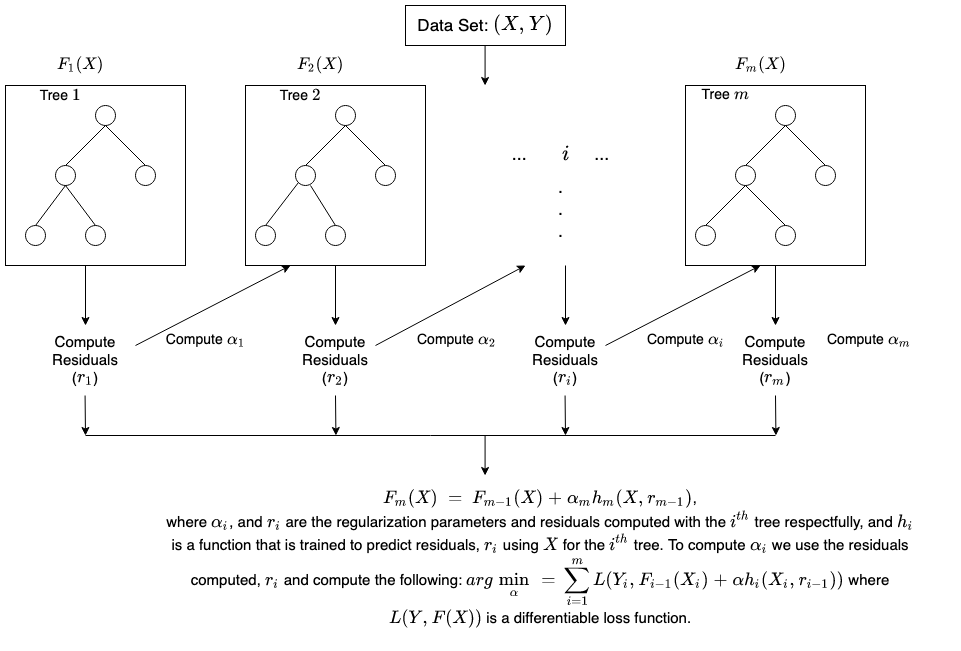

In [332]:
# Ilustrasi singkat cara kerja gradient tree boosting

from IPython.display import Image
Image(filename="./xgboost_illustration.png")

**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya akan digunakan model XGBoost ini sebagai model akhir. Pada tahap ini, akan dilakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [304]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [305]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [327]:
# Fitting data training untuk mencari parameter terbaik

random_xgb.fit(X_train, y_train)

/Users/citranikasejati/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/citranikasejati/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/citranikasejati/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/citranikasejati/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/citra

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=No

In [307]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE

pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,2.476430,0.108656,0.019118,0.001552,0.9,0.059948,119,8,0.05,5,...,315.159833,1,-0.182022,-0.173986,-0.178229,-0.179349,-0.176383,-0.177994,0.002712,1
20,1.382826,0.031798,0.013597,0.000051,0.9,0.007743,143,4,0.38,6,...,256.019501,2,-0.194941,-0.190242,-0.193677,-0.193511,-0.193375,-0.193149,0.001557,3
17,2.434665,0.079840,0.016968,0.001253,0.6,0.001,190,5,0.04,9,...,347.345709,3,-0.196852,-0.188223,-0.190448,-0.195653,-0.194119,-0.193059,0.003239,2
8,2.201344,0.108455,0.019464,0.001486,0.7,0.021544,182,6,0.31,2,...,473.963350,4,-0.191553,-0.199513,-0.199324,-0.200516,-0.199468,-0.198075,0.003288,4
43,2.060934,0.067041,0.017087,0.000744,0.5,0.16681,172,5,0.31,7,...,679.327679,5,-0.194103,-0.201106,-0.202846,-0.204883,-0.201566,-0.200901,0.003643,5


In [316]:
# Cek skor dan params terbaik

print('XGBoost Regressor')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost Regressor
Best_score: -43306.491835281406
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [309]:
# Model XGBoost Regressor
model = {'XGBoost Regressor': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGBoost Regressor,43453.851542,29074.190732,0.17579


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [322]:
# Sebelum hyperparameter tuning

pd.DataFrame(score_before_tuning.loc['XGBoost']).T

,RMSE,MAE,MAPE
XGBoost,44212.096185,29958.285058,0.181009


In [319]:
# Setelah hyperparameter tuning

score_after_tuning

,RMSE,MAE,MAPE
XGBoost Regressor,43453.851542,29074.190732,0.17579


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 44722.098842, 30208.189641, 0.182278
- RMSE, MAE & MAPE setelah tuning: 43439.87855, 28973.51415, 0.174805

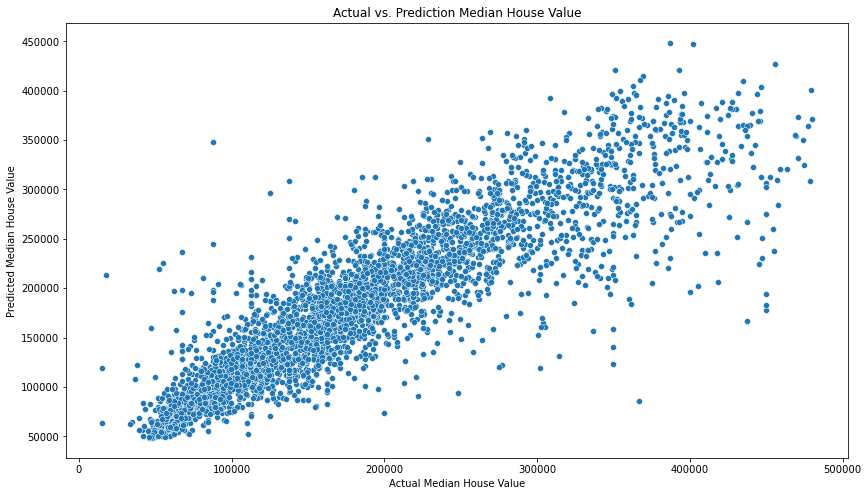

In [314]:
# Plot Actual and Prediction Median House Value

plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Median House Value', 
                                               xlabel='Actual Median House Value', 
                                               ylabel='Predicted Median House Value');

Dari plot di atas, terlihat bahwa masih terdapat cukup banyak bias antara harga aktual dan prediksi. Semakin naik nilai median_house_value-nya, semakin bias juga nilai antara prediksi dan aktualnya, sebagaimana tergambar pada visualisasi.

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (median_house_value), kita dapat mengeceknya melalui function feature_importances_.

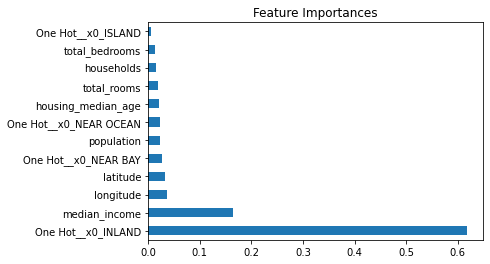

In [328]:
# Plot feature importances

feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances');

Dari plot di atas terlihat bahwa rumah yang berada di area INLAND mempunyai pengaruh yang besar terhadap tingginya nilai median_house_value. Selain itu, fitur-fitur median_income, longitude, dan latitude juga mempengaruhi cukup besar pada nilai target.

### **5. Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur 'ocean_proximity' dan 'median_income' menjadi fitur yang paling berpengaruh terhadap 'median_house_value'.

Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~17%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga rumah di California pada rentang nilai seperti yang dilatih terhadap model (maksimal harga USD 480275), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 17% dari harga seharusnya. 
 
Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan aspek properti dan juga services, seperti luas bangunan, ada atau tidaknya garasi, kolam renang, dan lain-lain.

Model ini tentu masih dapat diimporvisasi agar dapat menghasilkan prediksi yang lebih baik lagi. Namun, kita dapat melakukan A/B testing terhadap model yang sudah dibuat pada project ini untuk mengetahui tingkat efektifitas penggunaan model terhadap peningkatan jumlah klien. Nantinya, dari hasil A/B testing, kita bisa mendapatkan insight lainnya terkait perihal yang bisa dan harus diperbaiki pada model.

### **6. Recommendations**

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kemudian error tersebut dapat dikelompokkan ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. Nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya dapat diketahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga bisa melakukan training ulang dengan penerapan feature engineering lainnya.
<br><br>
2. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('median_house_value'), seperti luas bangunan atau fasilitas yang tersedia, seperti parkir mobil, halaman rumah, kolam renang, dll. Selain itu, adanya penambahan data terkini untuk harga rumah di California tentu juga akan dapat mengimprovisasi kapasitas prediksi dari model.
<br><br>
3. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.

Dari segi bisnis, rekomendasi yang bisa dilakukan di antaranya:

1. Melakukan riset harga jual rumah secara berkala dalam frekuensi waktu tertentu, misalkan 3 tahun sekali, untuk mendapatkan data terbaru dengan variabel data yang lebih lengkap dan dinilai memiliki korelasi dengan harga rumah.
<br><br>

****

#### **Save Model**

In [ ]:
# Save model

# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Model_California_Housing_XGB.sav', 'wb'))

In [ ]:
# Load model

# filename = 'Model_California_Housing_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))